In [1]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
# from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df = pd.read_csv('results.csv')

In [4]:
mapping = {False: 1, True: 0}
df = df.replace({'correctness': mapping})

df_rt = df.groupby(['participantID', 'condition'])[['reactionTime']].mean()
df_err = df.groupby(['participantID', 'condition'])[['correctness']].mean()

In [5]:
df_err.head()

correctness
participantID condition             
1             V             0.125000
              VH            0.083333
2             V             0.416667
              VH            0.333333
3             V             0.145833

In [6]:
df_rt = df_rt.reset_index()
df_rt.head()

,participantID,condition,reactionTime
0,1,V,7.489875
1,1,VH,6.650271
2,2,V,19.074000
3,2,VH,17.403833
4,3,V,11.666312


<Axes: title={'center': 'reactionTime'}, xlabel='condition'>

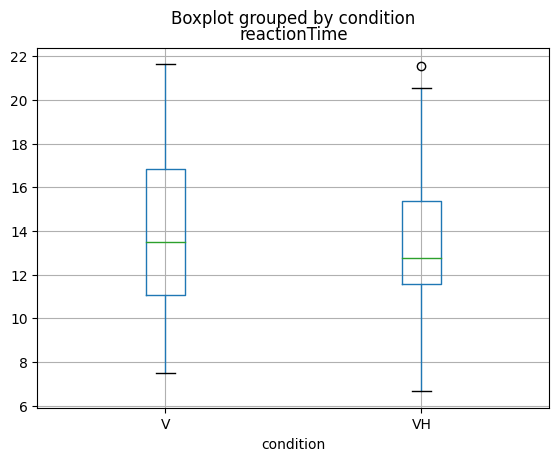

In [7]:
df_rt.boxplot(column='reactionTime', by='condition')

In [31]:
# Calculate the mean response time per condition
mean_response_times = df_rt.groupby('condition')['reactionTime'].mean()

# Output the results
print(mean_response_times)

condition
V     13.938905
VH    13.397716
Name: reactionTime, dtype: float64


In [8]:
df_rt.groupby('condition').std()

,participantID,reactionTime
condition,,
V,5.338539,4.199346
VH,5.338539,4.067120


In [9]:
import pingouin as pg
pg.normality(df_rt, dv='reactionTime', group='condition', method='shapiro', alpha=0.05)

,W,pval,normal
condition,,,
V,0.955433,0.516421,True
VH,0.966604,0.731956,True


In [10]:
# Replaced Friedman test with repeated measures ANOVA as Desktop data is normally distributed
# pg.friedman(data=df_rt, dv='reactionTime', within='condition', subject='participantID', method='chisq')
pg.rm_anova(data=df_rt, dv='reactionTime', within='condition', subject='participantID', correction='auto', detailed=False, effsize='ng2')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,condition,1,17,5.334217,0.033734,0.004517,1.0


In [11]:
# Replaced with Bonferroni-corrected post hoc tests
# pg.pairwise_tests(data=df_rt, dv='reactionTime', between=None, within='condition', subject='participantID', parametric=False, marginal=True, alpha=0.05, alternative='two-sided', padjust='bonf', effsize='cohen', correction='auto', nan_policy='listwise', return_desc=False, interaction=True, within_first=True)
pg.pairwise_tests(data=df_rt, dv='reactionTime', within='condition', subject='participantID', parametric=True, alpha=0.05, padjust='bonf', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,condition,V,VH,True,True,2.309592,17.0,two-sided,0.033734,1.966,0.130919


<ipython-input-12-558394e70974>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x="condition", y="reactionTime", data=df_rt, palette="colorblind")


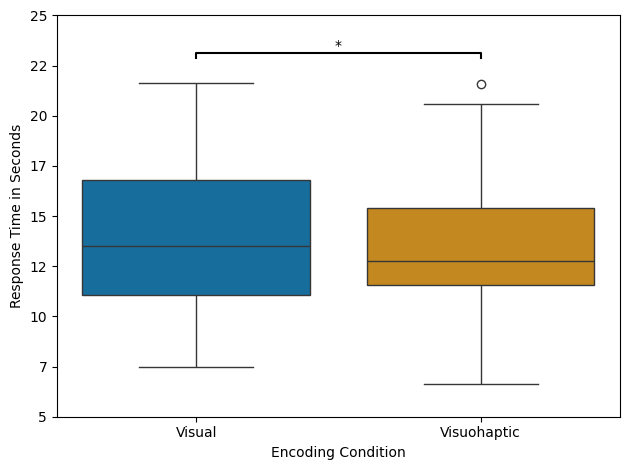

In [12]:
g = sns.boxplot(x="condition", y="reactionTime", data=df_rt, palette="colorblind")
g.set_xticks([0, 1])
g.set_xticklabels(['Visual', 'Visuohaptic'])
g.set_ylabel('Response Time in Seconds')
g.set_xlabel('Encoding Condition')

# statistical annotation for two conditions
x1, x2 = 0, 1  # Only two conditions
y, h, col = df_rt['reactionTime'].max() + 2.5, 2, 'k'

# Plotting the line and asterisk for statistical significance between x1 and x2
plt.plot([x1, x1, x2, x2], [y-1.25, y-1, y-1, y-1.25], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1, "*", ha='center', va='bottom', color=col)

plt.ylim(5, 25)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))

plt.tight_layout()
plt.savefig('tct.pdf', format='pdf')

plt.show()

In [13]:
df_err = df_err.reset_index()
df_err.head()

,participantID,condition,correctness
0,1,V,0.125000
1,1,VH,0.083333
2,2,V,0.416667
3,2,VH,0.333333
4,3,V,0.145833


<Axes: title={'center': 'correctness'}, xlabel='condition'>

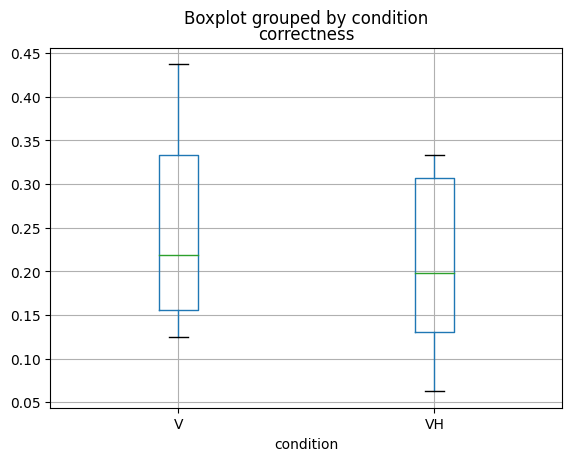

In [14]:
df_err.boxplot(column='correctness', by='condition')

In [15]:
df_err.groupby('condition').std()

,participantID,correctness
condition,,
V,5.338539,0.102284
VH,5.338539,0.095671


In [16]:
pg.normality(df_err, dv='correctness', group='condition', method='shapiro', alpha=0.05)

,W,pval,normal
condition,,,
V,0.906804,0.075581,True
VH,0.897572,0.052135,True


In [17]:
pg.rm_anova(data=df_err, dv='correctness', within='condition', subject='participantID', correction='auto', detailed=False, effsize='ng2')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,condition,1,17,24.19729,0.00013,0.057296,1.0


In [23]:
pg.pairwise_tests(data=df_err, dv='correctness', between=None, within='condition', subject='participantID', parametric=True, marginal=True, alpha=0.05, alternative='two-sided', padjust='bonf', effsize='cohen', correction='auto', nan_policy='listwise', return_desc=False, interaction=True, within_first=True)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,condition,V,VH,True,True,4.919074,17.0,two-sided,0.00013,223.667,0.479172


In [30]:
V_data = df_err[df_err['condition'] == 'V']['correctness'].values
VH_data = df_err[df_err['condition'] == 'VH']['correctness'].values
results = pg.ttest(x=V_data, y=VH_data, paired=True)
print(results)


               T  dof alternative    p-val         CI95%   cohen-d     BF10  \
T-test  4.919074   17   two-sided  0.00013  [0.03, 0.07]  0.479172  223.667   

           power  
T-test  0.483211  


<ipython-input-25-45f94ce06650>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x="condition", y="correctness", data=df_err, palette="colorblind")


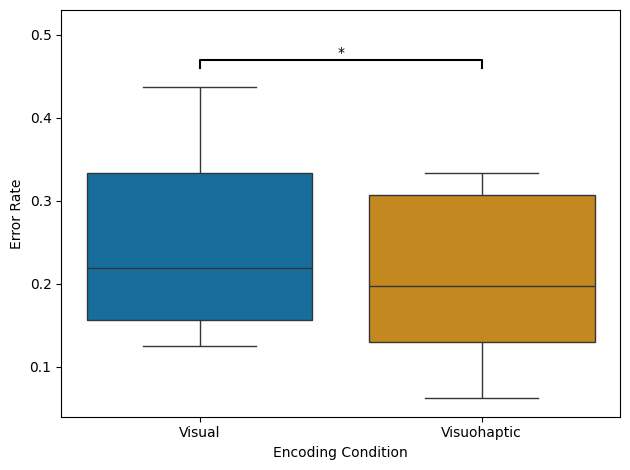

In [25]:
g = sns.boxplot(x="condition", y="correctness", data=df_err, palette="colorblind")

g.set_xticks([0, 1])
g.set_xticklabels(['Visual', 'Visuohaptic'])
g.set_ylabel('Error Rate')
g.set_xlabel('Encoding Condition')

# statistical annotation for two conditions
x1, x2 = 0, 1  # Only two conditions
y, h, col = df_err['correctness'].max() + 1.25, 2, 'k'

# Plotting the line and asterisk for statistical significance between x1 and x2
plt.plot([x1, x1, x2, x2], [0.46, 0.47, 0.47, 0.46], lw=1.5, c=col)
plt.text((x1+x2)*.5, 0.47, "*", ha='center', va='bottom', color=col)

plt.ylim(0.04, 0.53)

plt.tight_layout()

plt.savefig('num_errors.pdf', format='pdf')

plt.show()

In [26]:
import pandas as pd

# Assuming `data` is your main DataFrame
# Summarize correctness and reaction time by condition
summary_by_condition = df.groupby('condition').agg(
    correct=('correctness', 'sum'),
    total=('correctness', 'count'),
    mean_reaction_time=('reactionTime', 'mean'),
    std_reaction_time=('reactionTime', 'std')
)

# Calculate the proportion of correct responses
summary_by_condition['proportion_correct'] = summary_by_condition['correct'] / summary_by_condition['total']

summary_by_condition


,correct,total,mean_reaction_time,std_reaction_time,proportion_correct
condition,,,,,
V,218,864,13.938905,6.078501,0.252315
VH,177,864,13.397716,5.934034,0.204861


In [27]:
import numpy as np
import statsmodels.stats.power as smp

# Calculate effect size for repeated measures ANOVA
ng2 = summary_by_condition['proportion_correct'].var() / summary_by_condition['proportion_correct'].mean()  # Eta-squared (η²)
effect_size_correctness = np.sqrt(ng2 / (1 - ng2))  # Convert to Cohen's f

# Power analysis for repeated measures ANOVA
rm_anova_power_analysis = smp.FTestAnovaPower()
sample_size_correctness = rm_anova_power_analysis.solve_power(
    effect_size=effect_size_correctness,
    power=0.80,
    alpha=0.05,
    k_groups=len(summary_by_condition)
)

print(f"Required sample size for repeated measures ANOVA: {sample_size_correctness:.2f}")


Required sample size for repeated measures ANOVA: 1587.56


In [28]:
from statsmodels.stats.power import FTestAnovaPower

# Calculate the mean ranks for reaction times by condition
mean_ranks = df.groupby('condition')['reactionTime'].mean().rank().values
mean_rank_diff = mean_ranks - mean_ranks.mean()
effect_size_reaction_time = np.sqrt(np.sum(mean_rank_diff**2) / len(mean_ranks))

# Power analysis for ANOVA on ranks (Friedman's test approximation)
friedman_power_analysis = FTestAnovaPower()
sample_size_reaction_time = friedman_power_analysis.solve_power(
    effect_size=effect_size_reaction_time,
    power=0.80,
    alpha=0.05,
    k_groups=len(mean_ranks)
)

print(f"Required sample size for Friedman's test (approximation): {sample_size_reaction_time:.2f}")


Required sample size for Friedman's test (approximation): 33.43
